# AB TESTİNG

* A bir özelliği ya da bir grubu temsil eder. B başka bir grubu ya da özelliği temsil eder. Bu ikisini kıyaslıyor olacağız. 

In [ ]:
pip install statsmodels

In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

### Sampling(ÖRNEKLEM): 
* Bir ana kitle içerisinden bu ana kitlenin özelliklerini iyi taşıdığı düşünülen bir gruptur. 


In [4]:
populasyon = np.random.randint(0,80, 100000)
populasyon.mean()

39.54226

In [5]:
np.random.seed(115)

# ".seed()" metodu, rastgele bir işlevin durumunu kaydetmek için kullanılır, 
# böylece aynı bilgisayarda veya farklı bilgisayarlarda kodun birden çok yürütülmesinde aynı rasgele sayıları üretebilir.

orneklem1 = np.random.choice(a=populasyon, size=100)
orneklem1.mean()
#Görüldüğü üzere yukardaki populasyonlar orneklem1 arasında çok küçük bir fark çıkmıştır. 

36.08

In [6]:
#10 tane örneklem alalım. 
orneklem2 = np.random.choice(a=populasyon, size=100)
orneklem3 = np.random.choice(a=populasyon, size=100)
orneklem4 = np.random.choice(a=populasyon, size=100)
orneklem5 = np.random.choice(a=populasyon, size=100)
orneklem6 = np.random.choice(a=populasyon, size=100)
orneklem7 = np.random.choice(a=populasyon, size=100)
orneklem8 = np.random.choice(a=populasyon, size=100)
orneklem9 = np.random.choice(a=populasyon, size=100)
orneklem10 = np.random.choice(a=populasyon, size=100)

In [7]:
#Daha sonra bu örneklemlerin ortalamasını alalım. 
#Fark edeceğiz ki, populasyon ortalamasına daha da yaklaşmıştır. Dolayısıyla buradan şöyle bir çıkarım yapılabilir;
#Örneklem arttıkça, örneklem çeşitliliği arttıkça bulduğumuz sonuç populasyona daha da yaklaşacaktır. 
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean()
 + orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10

38.701

### Descriptive Statistics (Betimsel İstatistikler)

In [8]:
df = sns.load_dataset("tips")
df.describe().T

# '.describe()' metodu verisetindeki sayısal değişkenleri seçerek onları betimler. Bize elimizdeki veri ile ilgili hızlı bir şekilde bilgi edinebileceğimiz temel istatistikleri verir.
# Çeyrek değerler bize ilgili değişkenin dağılımını vermektedir. 
# Örneğin elimizde bir veriseti var ve 12 aylık bir satışı içeriyor. Bu verisetinin ilk 9 ayında 50bin birim satış var son üç ayında ise 170 bin satış var. 
# Yukardaki veri seti için ortalama mı medyan mı tercih edilmeli? 
# Medyanı tercih etmek daha doğru çünkü ilk 9 ay ve son 3 ayın dağılımı çarpıktır. Eğer elimizdeki verilerin dağılımları arasında aykırı değerler varsa bu durumda medyanı kullanmak daha doğrudur. 


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### Confidence Intervals (Güven Aralıkları)

In [9]:
# Ana kütle parametresinin tahmini değerini (istatistik) kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır. 
# Örneğin web sitesinde geçirilen ortalama sürenin güven aralığını bulmak istesek;
# Ortalama: 180sn 
# Standart Sapma: 40sn 
# Geçirdiklari zamanın tam nerelerinde olduğunu değerlendirmek zor. bunun yerine kullanıcıların %95 güven ile 172-188sn geçirmekte gibi bir aralık verilseydi daha değerli bir yorum olurdu. 

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
sms.DescrStatsW(df["total_bill"]).tconfint_mean()

#.tconfint_mean() metodu ile güven aralığı bulunmaktadır. 
# % 95 güven düzeyinde total bills'in ortalaması bu aralıkta olacaktır.

(18.663331704358477, 20.90855354154317)

In [11]:
# Titanic Veri Setindeki Sayısal Değişkenler için Güven Aralığı Hesabı
df = sns.load_dataset("titanic")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
sms.DescrStatsW(df["age"].dropna()).tconfint_mean()
# Titanic verisetindeki yaş başlığı altında bulunan boş değerleri .dropna ile uçuruyoruz daha sonra güven aralığı bakıyoruz. 

(28.631790041821507, 30.766445252296133)

In [13]:
sms.DescrStatsW(df["fare"].dropna()).tconfint_mean()

(28.93683123456731, 35.47158470258192)

### Correlation (Korelasyon)

* Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir. 1 ile -1 arasında yer alır. 

In [14]:
# Bahşiş veri seti:
# total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)
# tip: bahşiş
# sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)
# smoker: grupta sigara içen var mı? (0=No, 1=Yes)
# day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)
# time: ne zaman? (0=Day, 1=Night)
# size: grupta kaç kişi var?

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
# Verilen bahşiş ile ödenen hesap arasında bir korelasyon olup olmadığına bakacağız,
#Yukarda gördüğümüz üzere total billin içine tip de dahil. Dolayısıyla ödenen hesabı bulmak için total billden tip'i çıkarıyoruz.

df["total_bill"] = df["total_bill"] - df["tip"]

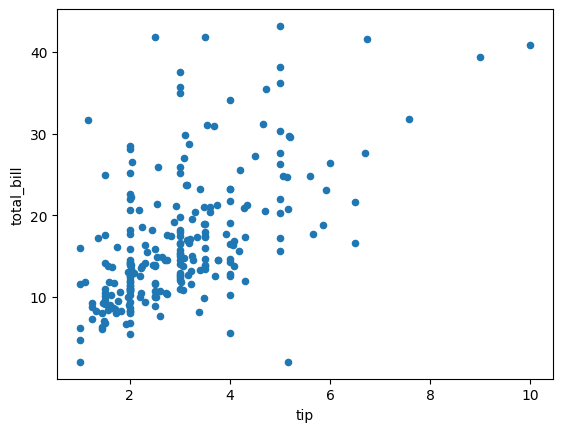

In [16]:
#Korelasyonu görmek için .plot.scatter yapıyoruz. 
#Aşağıdaki iki değişken arasında pozitif yönlü bir ilişki ve orta şiddetin üstünde bir ilişki vardır. 
df.plot.scatter("tip", "total_bill")
plt.show()

In [17]:
# .cor metodu ile iki değişken arasındaki corelasyonu gözlemlemek istediğimizde kullanıyoruz. 
# Ödenen hesap miktarı arttıkça bahşişinde arttığı yorumunu yapabiliriz. 
df["tip"].corr(df["total_bill"])

0.5766634471096378

# HİPOTEZ TESTLERİ

* Grup karşılaştırmalarında temel amaç olası farklılıkların şans eseri ortaya çıkıp çıkmadığını göstermektir. 

## Bağımsız İki Örneklem T Testi 

* AB testi dendiğinde ya iki grubun ortalaması ya da iki gruba ilişkin oranlar kıyaslanıyordur. 
* Bu bölümde bağımsız iki örneklem t testini ele alacağız. 
* Bağımsız iki örneklem t testi:İki grubun ortalaması arasında karşılaştırma yapmak istediğimizde kullanırız. İki grubun normal dağılması ve iki grubun vayryanslarının homojen olması gerekmektedir. 

1. Hipotezleri Kur
2. Varsayımları incele
    1. Normallik Varsayımı
    2. Varyans Homojenliği
3. Hipotezin Uygulanması
    1. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)
    2. Varsayımlar sağlanmıyorsa mannwhitneyu testi (non-parametrik test)
    
    * Not:

    Normallik sağlanmıyorsa direk 2 numara. Varyans homojenliği sağlanmıyorsa 1 numaraya arguman girilir.
    
    Normallik incelemesi öncesi aykırı değer incelemesi ve düzeltmesi yapmak faydalı olabilir.
4. p-value değerine göre sonuçları yorumla


## 1. Uygulama

In [18]:
# İki örneklem bağımsız ise buna bağımsız iki örneklem t testi denir. 
#  Uygulama 1: sigara içenler ile içmeyenlerin hesap ortalamaları arasında istatistiksel olarak anlamlı bir fark var mı?

df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
df.groupby("smoker").agg({"total_bill": "mean"})

#Sigara içenlerin hesap ortalaması 20.75 birim, sigara içmeyenlerin hesap ortalaması ise 19.18 birimdir. 

,total_bill
smoker,
Yes,20.756344
No,19.188278


In [20]:
# 1. Hipotezi Kur

# H0: M1 = M2 
# H1: M1 != M2

In [21]:
# 2. Varsayım Kontrolü

# a. Normallik Varsayımı- bunu test etmek için shapiro kullandım. 
# b. Varyans Homojenliği

In [22]:
# a. Normallik Varsayımı

# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1:..sağlanmamaktadır.

# Shapiro testi bir değişkenin dağılımının normal olup olmadığını test eder.

In [23]:
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "Yes", "total_bill"]) 
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#p value 0.05ten küçükse H0 reddedilir. Dolayısıyla h0 ı reddettim. H0=Normal dağılım varsayımı sağlanmaktadır. dolayısıyla bu test için normal dağılım varsayımı sağlanmamaktadır. 


Test Stat = 0.9367, p-value = 0.0002


In [24]:
# b. Varyans Homojenligi Varsayımı

# H0: Varyanslar Homojendir
# H1: Varyanslar Homojen Değildir
# Varyansların homojenliğini test etmek için 'levene' testi kullanılır. 
# p-value < ise 0.05 'ten HO RED.
# p-value < değilse 0.05 H0 REDDEDILEMEZ.

In [25]:

test_stat, pvalue = levene(df.loc[df["smoker"] == "Yes", "total_bill"],
                           df.loc[df["smoker"] == "No", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#p value 0.05ten küçükse H0 reddedilir. Dolayısıyla h0 ı reddettim. H0=Varyanslar homojendir. dolayısıyla varyanslar homojen değildir. 



Test Stat = 4.0537, p-value = 0.0452


In [26]:
# 3 ve 4. Hipotezin Uygulanması

# 1. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)- aslında varsayımlar sağlanmıyor ancak sağlanıyormuş gibi bakalım öncelikle.Bunun için 'ttest_ind' kullanılır.
# 2. Varsayımlar sağlanmıyorsa mannwhitneyu testi (non-parametrik test)


In [27]:
# 1.1 Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)


test_stat, pvalue = ttest_ind(df.loc[df["smoker"] == "Yes", "total_bill"],
                              df.loc[df["smoker"] == "No", "total_bill"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# p-value < ise 0.05 'ten HO RED.
# p-value < değilse 0.05 H0 REDDEDILEMEZ.
#p-value 0.18 olduğu için H0 reddedilemez. H0: sigara içenler ve içmeyenler arasında anlamlı bir fark yoktur. H0 reddedildiği için, sigara içenler ve ödenen hesaplar arasında anlamlı bir fark yoktur. 

Test Stat = 1.3384, p-value = 0.1820


In [28]:
# 1.2 Varsayımlar sağlanmıyorsa mannwhitneyu testi (non-parametrik test)


test_stat, pvalue = mannwhitneyu(df.loc[df["smoker"] == "Yes", "total_bill"],
                                 df.loc[df["smoker"] == "No", "total_bill"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# burada da H0 0.34 olduğu için H0 reddedilemez olarak görüyoruz. Dolyısıyla sigara içenler ve içmeyenlerin ödemeleri arasında anlamlı bir fark yoktur. 



Test Stat = 7531.5000, p-value = 0.3413


## 2. Uygulama
- Titanic Kadın ve Erkek Yolcuların Yaş Ortalamaları Arasında İstatistiksel Olarak Anlamlı Bir Fark var mıdır?



In [29]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
#bu gemide kadın ve erkeklerin yaş ortalamaları arasında fark var mı bakalım. 
df.groupby("sex").agg({"age": "mean"})

,age
sex,
female,27.915709
male,30.726645


In [31]:

# 1. Hipotezleri kur:
# H0: M1  = M2 (Kadın ve Erkek Yolcuların Yaş Ortalamaları Arasında İstatistiksel Olarak Anl. Fark. Yoktur)
# H1: M1! = M2 (... vardır)


# 2. Varsayımları İncele
# Normallik varsayımı- shapiro kullanıyoruz. 
# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1:..sağlanmamaktadır



In [32]:
# Normallik varsayımı- shapiro kullanıyoruz.
test_stat, pvalue = shapiro(df.loc[df["sex"] == "female", "age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#h0 reddedilir.  

Test Stat = 0.9848, p-value = 0.0071


In [33]:

test_stat, pvalue = shapiro(df.loc[df["sex"] == "male", "age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#H0 reddedilir. 


Test Stat = 0.9747, p-value = 0.0000


In [34]:
# Varyans homojenliği
# H0: Varyanslar Homojendir
# H1: Varyanslar Homojen Değildir

test_stat, pvalue = levene(df.loc[df["sex"] == "female", "age"].dropna(),
                           df.loc[df["sex"] == "male", "age"].dropna())

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#h0 reddedilmez. varyanslar homojendir. Ama normallik varsayımı reddedildiği için mannwhitneyu kullanacağız. 

Test Stat = 0.0013, p-value = 0.9712


In [35]:
# Varsayımlar sağlanmadığı için nonparametrik

test_stat, pvalue = mannwhitneyu(df.loc[df["sex"] == "female", "age"].dropna(),
                                 df.loc[df["sex"] == "male", "age"].dropna())

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

#h0 reddedilir. yani kadın ve erkeklerin yaş ortalamaları arasında anlamlı bir fark vardır. 



Test Stat = 53212.5000, p-value = 0.0261


## 3. Uygulama
- Diyabet Hastası Olan ve Olmayanların Yaşları Ort. Arasında İst. Ol. Anl. Fark var mıdır?



In [36]:
df = pd.read_csv("/Users/elifbagci/Desktop/Miuul:DATA SCİENCE/Elif Miuul notlar/Measurement Problems/measurement_problems/datasets/diabetes.csv")
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.groupby("Outcome").agg({"Age": "mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [38]:
# 1. Hipotezleri kur
# H0: M1 = M2
# Diyabet Hastası Olan ve Olmayanların Yaşları Ort. Arasında İst. Ol. Anl. Fark Yoktur
# H1: M1 != M2
# .... vardır.

# 2. Varsayımları İncele


In [39]:

# Normallik Varsayımı (H0: Normal dağılım varsayımı sağlanmaktadır.)
test_stat, pvalue = shapiro(df.loc[df["Outcome"] == 1, "Age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["Outcome"] == 0, "Age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#h0 red olduğu için direk mannwhitneyu testine geçeceğiz. 

Test Stat = 0.9546, p-value = 0.0000
Test Stat = 0.8012, p-value = 0.0000


In [40]:

# Normallik varsayımı sağlanmadığı için nonparametrik.

# Hipotez (H0: M1 = M2)
test_stat, pvalue = mannwhitneyu(df.loc[df["Outcome"] == 1, "Age"].dropna(),
                                 df.loc[df["Outcome"] == 0, "Age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#h0 reddedildi. Dolayısıyla diyabet olanlar ve olmayanlar arasında istatistiki olarak anlamlı bir fark vardır. Yani yaş ilerledikçe DM olma durumu artar. 



Test Stat = 92050.0000, p-value = 0.0000


## 4. Uygulama
- Kursun Büyük Çoğunluğunu İzleyenler ile İzlemeyenlerin Puanları Birbirinden Farklı mı?




In [41]:
# H0: M1 = M2 (... iki grup ortalamaları arasında ist ol.anl.fark yoktur.)
# H1: M1 != M2 (...vardır)

df = pd.read_csv("/Users/elifbagci/Desktop/Miuul:DATA SCİENCE/Elif Miuul notlar/Measurement Problems/measurement_problems/datasets/course_reviews.csv")
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0


In [42]:
#Bir kursa girip sonuna kadar izleyen ve kursa gelip izlemeden puan verenlerin puanları farklı mıdır? 
#Örneğin ilerlemesi %75ten çok ve %25ten az olanların ortalamasına bakalım. 
df[(df["Progress"] > 75)]["Rating"].mean()

df[(df["Progress"] < 25)]["Rating"].mean()


4.7225029148853475

In [43]:

test_stat, pvalue = shapiro(df[(df["Progress"] > 75)]["Rating"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


test_stat, pvalue = shapiro(df[(df["Progress"] < 25)]["Rating"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#Normallik varsayımı sağlanmadığı için mannwhitneyu testi yapacağız. 

Test Stat = 0.3160, p-value = 0.0000
Test Stat = 0.5710, p-value = 0.0000


In [44]:
test_stat, pvalue = mannwhitneyu(df[(df["Progress"] > 75)]["Rating"],
                                 df[(df["Progress"] < 25)]["Rating"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# H0 reddedildi. Dolayısıyla kursu daha fazla izleyenlerin daha az izleyenlere göre verdikleri puan ortalamaları daha yüksektir. 

Test Stat = 661481.5000, p-value = 0.0000


## İki Örneklem Oran Testi

- Elimizde iki oran olacak bu iki oran arasında anlamlı bir fark var mı buna bakacağız. 
- H0: p1 = p2  (Yeni Tasarımın Dönüşüm Oranı ile Eski Tasarımın Dönüşüm Oranı Arasında İst. Ol. Anlamlı Farklılık Yoktur.)
- H1: p1 != p2 (... vardır)

In [45]:
basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

proportions_ztest(count=basari_sayisi, nobs=gozlem_sayilari)

#H0 reddedilir. 

(3.7857863233209255, 0.0001532232957772221)

In [46]:
#Peki hangisi daha iyidir? 
basari_sayisi / gozlem_sayilari
#1. grubun daha başarılı olduğunu gözlemliyoruz. 

array([0.3       , 0.22727273])

## Uygulama
- Kadın ve Erkeklerin Hayatta Kalma Oranları Arasında İst. Olarak An. Farklılık var mıdır?

In [47]:
# H0: p1 = p2
# Kadın ve Erkeklerin Hayatta Kalma Oranları Arasında İst. Olarak An. Fark yoktur

# H1: p1 != p2
# .. vardır

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:

df.loc[df["sex"] == "female", "survived"].mean()


0.7420382165605095

In [49]:
df.loc[df["sex"] == "male", "survived"].mean()

0.18890814558058924

In [50]:
female_succ_count = df.loc[df["sex"] == "female", "survived"].sum()
male_succ_count = df.loc[df["sex"] == "male", "survived"].sum()

test_stat, pvalue = proportions_ztest(count=[female_succ_count, male_succ_count],
                                      nobs=[df.loc[df["sex"] == "female", "survived"].shape[0],
                                            df.loc[df["sex"] == "male", "survived"].shape[0]])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

#H0 reddedilir. Yani kadınlar ve erkeklerin hayatta kalmaları arasında anlamlı bir fark vardır. 

Test Stat = 16.2188, p-value = 0.0000


## ANOVA (Analysis of Variance)
- İkiden fazla grup ortalamasını karşılaştırmak için kullanılır.

In [51]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
#Günler ve totalbill in ortalamaları arasında fark var mı bakıyoruz. 
df.groupby("day")["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [54]:
# 1. Hipotezleri kur

# HO: m1 = m2 = m3 = m4
# Grup ortalamaları arasında fark yoktur.

# H1: .. fark vardır

# 2. Varsayım kontrolü

# Normallik varsayımı
# Varyans homojenliği varsayımı

# Varsayım sağlanıyorsa one way anova
# Varsayım sağlanmıyorsa kruskal

# H0: Normal dağılım varsayımı sağlanmaktadır.



In [56]:
#Öyle bir işlem yapmalıyım ki her bir grup için normallik varsayımı bakmalıyım. Bir kategorik değişkenin sınıflarını listeye çevirdik. Bunların üzerinde gezilebilir hale getirdik. 
for group in list(df["day"].unique()):
    pvalue = shapiro(df.loc[df["day"] == group, "total_bill"])[1]
    print(group, 'p-value: %.4f' % pvalue)
    #Görüldüğü üzere hepsi için hızlı bir şekilde normallik testi gerçekleştirdik. Hepsi için h0 reddedilir. 

Sun p-value: 0.0036
Sat p-value: 0.0000
Thur p-value: 0.0000
Fri p-value: 0.0409


In [57]:
#2.ise varyans homojenliği varsayımı. Levene 4ü içinde yapabilir
test_stat, pvalue = levene(df.loc[df["day"] == "Sun", "total_bill"],
                           df.loc[df["day"] == "Sat", "total_bill"],
                           df.loc[df["day"] == "Thur", "total_bill"],
                           df.loc[df["day"] == "Fri", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.6654, p-value = 0.5741


In [58]:

# 3. Hipotez testi ve p-value yorumu

# Hiç biri sağlamıyor.
df.groupby("day").agg({"total_bill": ["mean", "median"]})

# HO: Grup ortalamaları arasında ist ol anl fark yoktur. 

total_bill       
           mean median
day                   
Thur  17.682742  16.20
Fri   17.151579  15.38
Sat   20.441379  18.24
Sun   21.410000  19.63

In [60]:

# Varsayım sağlanıyorsa(ki sağlanmıyor), parametrik anova testi:
f_oneway(df.loc[df["day"] == "Thur", "total_bill"],
         df.loc[df["day"] == "Fri", "total_bill"],
         df.loc[df["day"] == "Sat", "total_bill"],
         df.loc[df["day"] == "Sun", "total_bill"])
#pvalue 0.05ten küçük olduğu için h0 reddedilir. 


F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [61]:
#Varsayım sağlanmıyorsa, Nonparametrik anova testi:
kruskal(df.loc[df["day"] == "Thur", "total_bill"],
        df.loc[df["day"] == "Fri", "total_bill"],
        df.loc[df["day"] == "Sat", "total_bill"],
        df.loc[df["day"] == "Sun", "total_bill"])

H0 red. Gruplar arasında anlamlı bir fark vardır. 

KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127)

In [64]:
#Farklılık hangi gruptan kaynaklanıyor. Bunun için aşağıdaki yöntemi takip ederiz. 
from statsmodels.stats.multicomp import MultiComparison
comparison = MultiComparison(df['total_bill'], df['day'])
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4541 -2.4799  9.0595  False
   Fri    Sun   4.2584 0.2371 -1.5856 10.1025  False
   Fri   Thur   0.5312 0.9957 -5.4434  6.5057  False
   Sat    Sun   0.9686 0.8968 -2.6088   4.546  False
   Sat   Thur  -2.7586 0.2374 -6.5455  1.0282  False
   Sun   Thur  -3.7273 0.0668 -7.6264  0.1719  False
----------------------------------------------------
